In [1]:
import numpy as np
import scipy.special 
from decimal import Decimal  
import matplotlib
import matplotlib.pyplot as plt

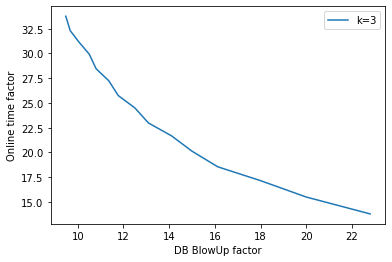

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 [38, 40, 42, 43, 45, 47, 48, 50, 51, 53, 54, 56, 57, 58, 60],
 array([13.78404875, 15.49193338, 17.1464282 , 18.54723699, 20.1246118 ,
        21.67948339, 22.97825059, 24.49489743, 25.74878638, 27.23967694,
        28.46049894, 29.93325909, 31.12876483, 32.31098884, 33.76388603]),
 array([22.8       , 20.        , 18.        , 16.125     , 15.        ,
        14.1       , 13.09090909, 12.5       , 11.76923077, 11.35714286,
        10.8       , 10.5       , 10.05882353,  9.66666667,  9.47368421]))

In [104]:
def prAtLeastChernoff(p, n, k):
    #a = float(k)/n - p
    a = k/n - p
    return np.power(np.power(p/(p+a),p+a)*np.power((1-p)/(1-p-a),1-p-a) ,n) 

def minBlockSizeForQueries(lam, p, q):
    errBits = 0
    # Starting block size for search
    B = np.int(q/(1-p))
    while errBits < lam:
        B+=1
        # upper bound on the error: Pr[#Erasures >= B - q + 1]
        errBits = -np.log2(prAtLeastChernoff(p, B, B - q + 1))
        if B > lam*q:
            raise Exception("Something wierd, block size B=lam*q is not enough" 
                            "B=%d,q=%d, errBits: %d" % (B, q, errBits))
    return B
    
def hybridTradeoff():
    # Security parameter
    lam = 128
    
    # Number of sets / \sqrt{n}
    for k in range(3,4):
        # Erasure probability 
        p = np.exp(-k)

        Q = np.arange(5,20)
        B = [minBlockSizeForQueries(lam, p, q) for q in Q]

        blowUp = k*(B/Q)
        # Online time also grows with block size since each sets becomes bigger
        onlineTime = Q*np.sqrt(B/Q)

        plt.plot( blowUp, onlineTime, label=("k=%d"%k))
        #plt.plot(blowup, Q)

    plt.xlabel("DB BlowUp factor")
    plt.ylabel("Online time factor")
    plt.legend()
    plt.show()

    return Q, B, onlineTime, blowUp

hybridTradeoff()


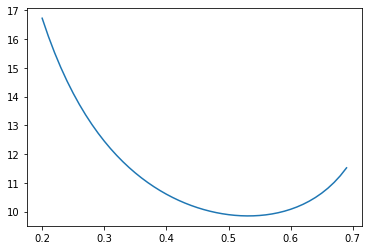

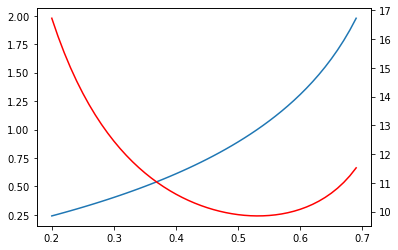

In [16]:
# Tring to play with both number of sets k\sqrt{n}, block size B, and number of queries d
lam = 80.0
d = 10.0


# The probabiliy of having at most k "heads" when tossing n independent coins with  probability p to be "heads" each.
def prAtLeast(p, n, k):
    pr = np.longdouble(0.0)
    for i in range(k):
        pr += np.longdouble(scipy.special.binom(n, i))*np.longdouble(np.power(p, i))*np.power(1-p,n-i)
    return 1.0-pr

def prAtLeastHoeffding(p, n, k):
    e = float(k)/n - p
    return np.exp(-2*e**2*n) 



def blowup(lam, d, eps):
    return -lam * np.log(1-eps-(eps**2)*2*d*np.log2(np.e)/lam)/(2*d*(eps**2)*np.log2(np.e))

eps = [0.01*i for i in range(20,70)]
bup = [ blowup(lam, d, i) for i in eps ]
k = [-np.log(1-e-(e**2)*2*d*np.log2(np.e)/lam) for e in eps]
B= [lam/(2*np.log(np.e)*e**2) for e in eps]


perr = [ prAtLeastHoeffding(np.power(np.e,-k[i]), int(B[i]), int(B[i]-d+1)) for i in range(len(eps))]

plt.plot(eps, bup)
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(eps, k)
ax2 = ax1.twinx() 
ax2.plot(eps, bup, color='red')
plt.show()